In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def load_data_from_mat(file_path, key):
    from scipy.io import loadmat
    data = loadmat(file_path)
    return data[key]

In [ ]:
def prepare_data_for_classification(classes):
    X, y = [], []
    for label, class_id in enumerate(classes):
        file_info = file_info_dict[class_id]  # Get file paths and keys for each class
        for file_path, key in file_info:
            data = load_data_from_mat(file_path, key)
            X.append(data)
            y.append(np.array([label] * data.shape[0]))  # Assign the same label to all samples
    X = np.concatenate(X)
    y = np.concatenate(y)
    return X, y

In [ ]:
# Define paths and keys for each class
file_info_dict = {
    'A': [('/content/drive/MyDrive/emdvmd/EMDF.mat', 'IMFemd1F')],
    'B': [('/content/drive/MyDrive/emdvmd/EMDN.mat', 'IMFemd1N')],
    'C': [('/content/drive/MyDrive/emdvmd/EMDO.mat', 'IMFemd1O')],
    'D': [('/content/drive/MyDrive/emdvmd/EMDS.mat', 'IMFemd1S')],
    'E': [('/content/drive/MyDrive/emdvmd/EMDZ.mat', 'IMFemd1Z')]
}

In [ ]:
def create_cnn_model(input_shape, filters, kernel_size, pool_size):
    model = Sequential()
    # Convolutional layer
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=pool_size))
    # Flatten and Dense layer
    model.add(Flatten())
    model.add(Dense(units=1, activation='sigmoid'))  # Binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
# Training and evaluating CNN model for binary classification
def train_and_evaluate_cnn_model(X_train, y_train, X_test, y_test, filters, kernel_size, pool_size, batch_size, epochs):
    model = create_cnn_model((X_train.shape[1], 1), filters, kernel_size, pool_size)
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose=1)

    # Display the model architecture
    model.summary()

    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_binary)
    sensitivity = recall_score(y_test, y_pred_binary)
    specificity = recall_score(y_test, y_pred_binary, pos_label=0)  # For binary classification
    f1 = f1_score(y_test, y_pred_binary)

    print(f'Test accuracy: {accuracy}')
    print(f'Sensitivity (Recall for class 1): {sensitivity}')
    print(f'Specificity (Recall for class 0): {specificity}')
    print(f'F1 Score: {f1}')

    # Confusion Matrix
    plot_confusion_matrix(y_test, y_pred_binary)

    # Plot accuracy and loss
    def plot_accuracy_and_loss(history):
        # Plotting accuracy
        plt.figure(figsize=(12, 4))

        # Accuracy Plot
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend(loc='lower right')

        # Loss Plot
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend(loc='upper right')

        # Show plots
        plt.tight_layout()
        plt.show()

    # Call the function to plot the graphs
    plot_accuracy_and_loss(history)

Classification A-B vs. C-D-E

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7823 - loss: 0.3481 - val_accuracy: 0.9890 - val_loss: 0.0637
Epoch 2/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9882 - loss: 0.0537 - val_accuracy: 0.9936 - val_loss: 0.0305
Epoch 3/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9935 - loss: 0.0282 - val_accuracy: 0.9936 - val_loss: 0.0203
Epoch 4/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9961 - loss: 0.0170 - val_accuracy: 0.9942 - val_loss: 0.0159
Epoch 5/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9962 - loss: 0.0143 - val_accuracy: 0.9945 - val_loss: 0.0132
Epoch 6/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9971 - loss: 0.0114 - val_accuracy: 0.9954 - val_loss: 0.0116
Epoch 7/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9978 - loss: 0.0086 - val_accuracy: 0.9966 - val_loss: 0.0100
Epoch 8/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9983 - loss: 0.0073 - val_accuracy: 0.9973 - va

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 98, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           3,137 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,181 (39.77 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,788 (26.52 KB)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test accuracy: 0.9968269465462534
Sensitivity (Recall for class 1): 0.99553208773355
Specificity (Recall for class 0): 0.998776758409786
F1 Score: 0.9973550356052899


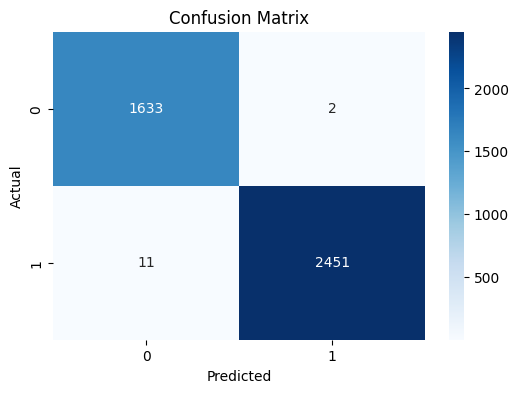

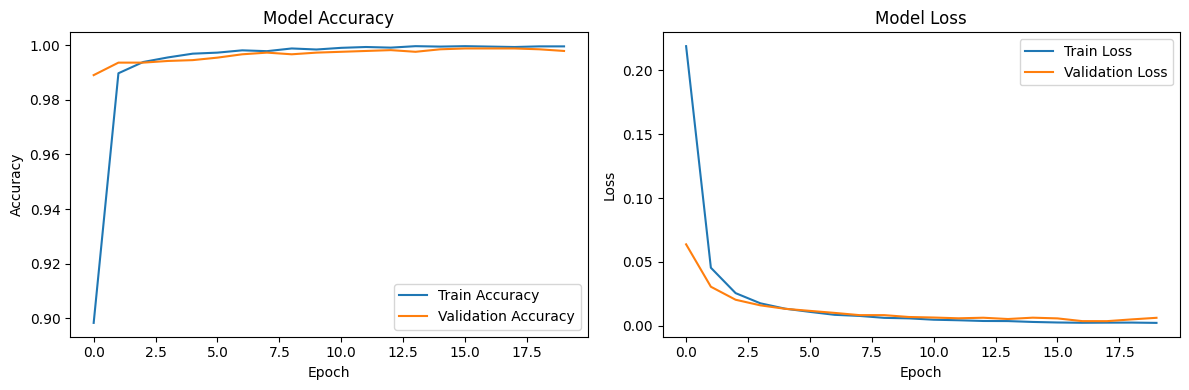

In [ ]:
# Load and preprocess data for classes A-B vs. C-D-E
classes_ab = ['A', 'B']
classes_cde = ['C', 'D', 'E']
X_ab, y_ab = prepare_data_for_classification(classes_ab)
X_cde, y_cde = prepare_data_for_classification(classes_cde)

# Merge and create new labels
X = np.concatenate([X_ab, X_cde])
y = np.concatenate([np.zeros(len(y_ab)), np.ones(len(y_cde))])  # 0 for A-B, 1 for C-D-E

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape data for CNN
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the CNN model
train_and_evaluate_cnn_model(X_train, y_train, X_test, y_test, filters=64, kernel_size=3, pool_size=2, batch_size=32, epochs=20)

Classification A vs. E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8210 - loss: 0.3963 - val_accuracy: 0.9924 - val_loss: 0.0734
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9956 - loss: 0.0486 - val_accuracy: 0.9985 - val_loss: 0.0240
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9992 - loss: 0.0192 - val_accuracy: 0.9969 - val_loss: 0.0156
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9998 - loss: 0.0095 - val_accuracy: 0.9985 - val_loss: 0.0106
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 0.9992 - val_loss: 0.0070
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9998 - loss: 0.0047 - val_accuracy: 0.9992 - val_loss: 0.0054
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.9992 - val_loss: 0.0045
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 98, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           3,137 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,181 (39.77 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,788 (26.52 KB)

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test accuracy: 1.0
Sensitivity (Recall for class 1): 1.0
Specificity (Recall for class 0): 1.0
F1 Score: 1.0


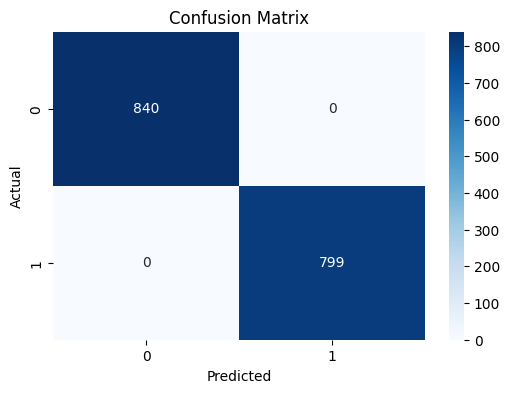

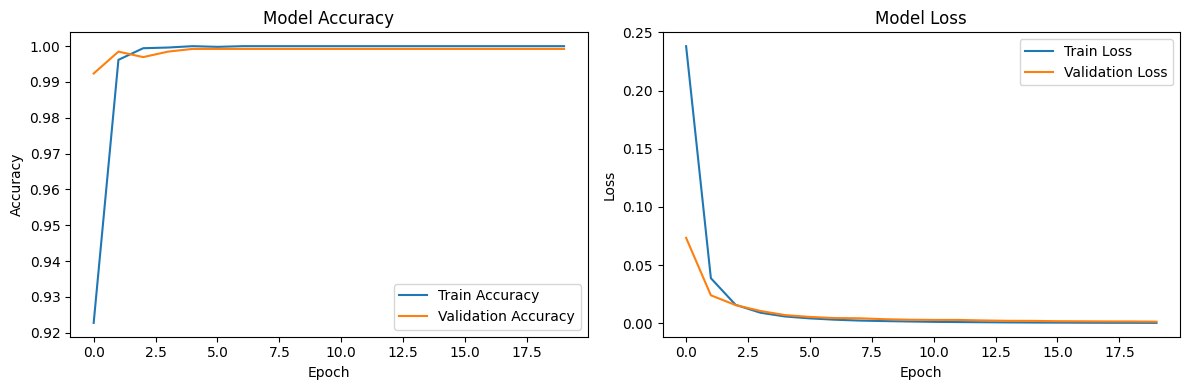

In [ ]:
# Load and preprocess data for classes A and E
classes_a = ['A']
classes_e = ['E']
X_a, y_a = prepare_data_for_classification(classes_a)
X_e, y_e = prepare_data_for_classification(classes_e)

# Merge and create new labels
X = np.concatenate([X_a, X_e])
y = np.concatenate([np.zeros(len(y_a)), np.ones(len(y_e))])  # 0 for A, 1 for E

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape data for CNN
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the CNN model (binary classification)
train_and_evaluate_cnn_model(X_train, y_train, X_test, y_test, filters=64, kernel_size=3, pool_size=2, batch_size=32, epochs=20)


Classification B vs. E

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7883 - loss: 0.4075 - val_accuracy: 0.9931 - val_loss: 0.0532
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9972 - loss: 0.0382 - val_accuracy: 0.9985 - val_loss: 0.0152
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9993 - loss: 0.0131 - val_accuracy: 0.9985 - val_loss: 0.0096
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9997 - loss: 0.0086 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9997 - loss: 0.0057 - val_accuracy: 0.9992 - val_loss: 0.0046
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 0.9992 - val_loss: 0.0044
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.9992 - val_loss: 0.0040
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - va

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)                    │ (None, 98, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │           3,137 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,181 (39.77 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,788 (26.52 KB)

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test accuracy: 0.9993898718730934
Sensitivity (Recall for class 1): 0.9987484355444305
Specificity (Recall for class 0): 1.0
F1 Score: 0.9993738259236067


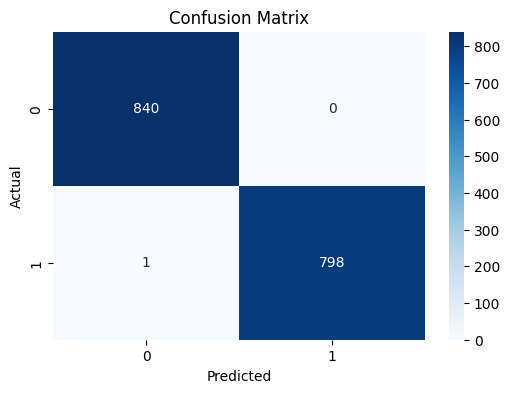

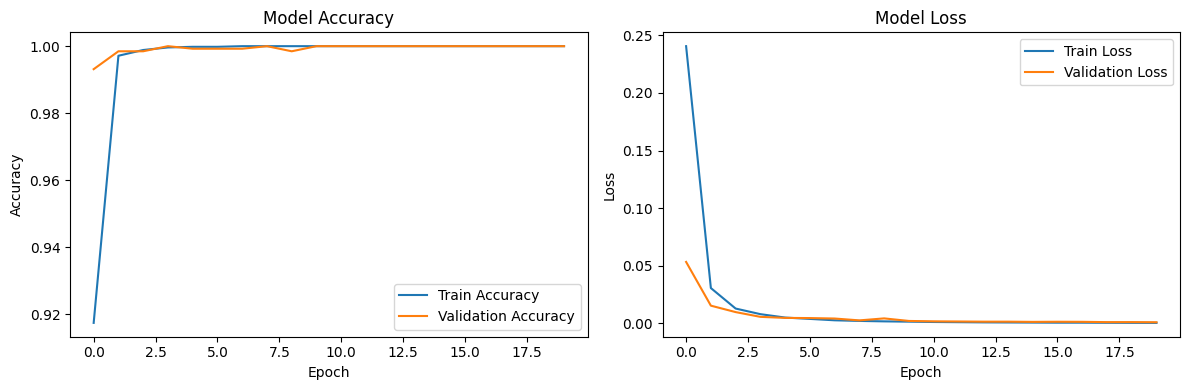

In [ ]:
# Load and preprocess data for classes B and E
classes_b = ['B']
classes_e = ['E']
X_b, y_b = prepare_data_for_classification(classes_b)
X_e, y_e = prepare_data_for_classification(classes_e)

# Merge and create new labels
X = np.concatenate([X_b, X_e])
y = np.concatenate([np.zeros(len(y_b)), np.ones(len(y_e))])  # 0 for B, 1 for E

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape data for CNN
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the CNN model
train_and_evaluate_cnn_model(X_train, y_train, X_test, y_test, filters=64, kernel_size=3, pool_size=2, batch_size=32, epochs=20)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8199 - loss: 0.3394 - val_accuracy: 1.0000 - val_loss: 0.0211
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 1.0000 - loss: 0.0146 - val_accuracy: 1.0000 - val_loss: 0.0052
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 9.1861e-04 - val_accuracy: 1.0000 - val_loss: 7.3086e-04
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 6.5844e-04 - val_accuracy: 1.0000 - val_loss: 5.5506e-04
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 4.6207e-04 - val_a

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 98, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │           3,137 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,181 (39.77 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,788 (26.52 KB)

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test accuracy: 1.0
Sensitivity (Recall for class 1): 1.0
Specificity (Recall for class 0): 1.0
F1 Score: 1.0


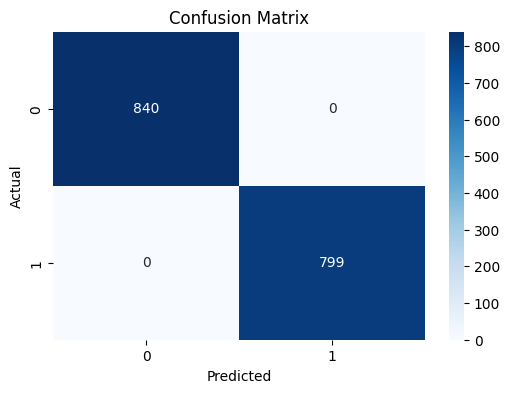

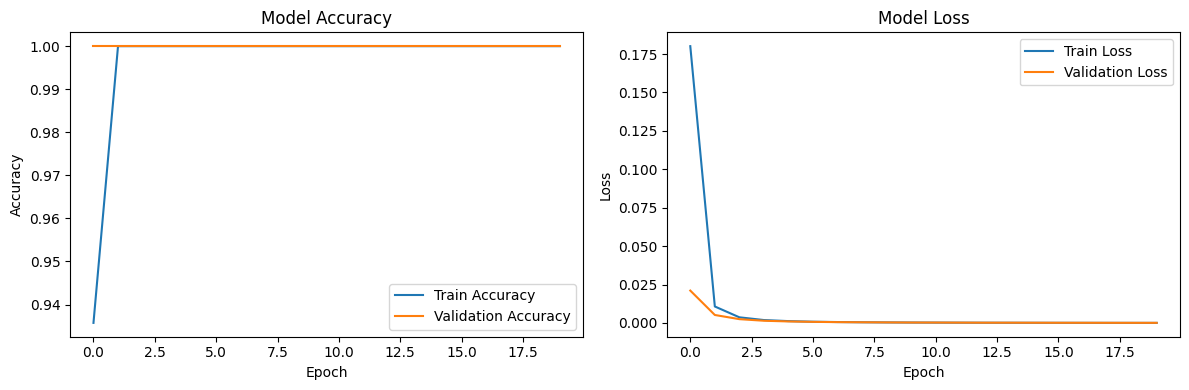

In [ ]:
# Load and preprocess data for classes A and C
classes_a = ['A']
classes_c = ['C']
X_a, y_a = prepare_data_for_classification(classes_a)
X_c, y_c = prepare_data_for_classification(classes_c)

# Merge and create new labels
X = np.concatenate([X_a, X_c])
y = np.concatenate([np.zeros(len(y_a)), np.ones(len(y_c))])  # 0 for A, 1 for C

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape data for CNN
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train and evaluate the CNN model
train_and_evaluate_cnn_model(X_train, y_train, X_test, y_test, filters=64, kernel_size=3, pool_size=2, batch_size=32, epochs=20)


Classification B-D

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7604 - loss: 0.3285 - val_accuracy: 1.0000 - val_loss: 0.0105
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 8.7475e-04
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 7.6412e-04 - val_accuracy: 1.0000 - val_loss: 4.9539e-04
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 4.4787e-04 - val_accuracy: 1.0000 - val_loss: 3.1747e-04
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 3.0195e-04 - val_accuracy: 1.0000 - val_loss: 2.2123e-04
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 2.0476e-04 - val_accuracy: 1.0000 - val_loss: 1.6288e-04
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)                    │ (None, 98, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │           3,137 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,181 (39.77 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,788 (26.52 KB)

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test accuracy: 1.0
Sensitivity (Recall for class 1): 1.0
Specificity (Recall for class 0): 1.0
F1 Score: 1.0


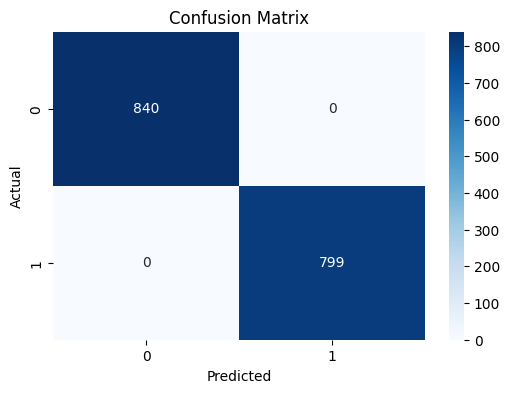

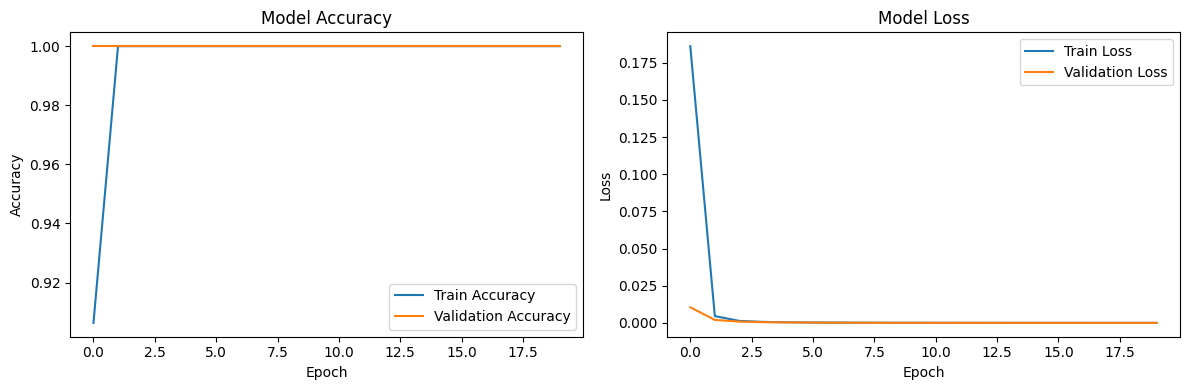

In [ ]:
# Load and preprocess data for classes B and D
classes_b = ['B']
classes_d = ['D']
X_b, y_b = prepare_data_for_classification(classes_b)
X_d, y_d = prepare_data_for_classification(classes_d)

# Merge and create new labels
X = np.concatenate([X_b, X_d])
y = np.concatenate([np.zeros(len(y_b)), np.ones(len(y_d))])  # 0 for B, 1 for D

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape data for CNN
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train and evaluate the CNN model
train_and_evaluate_cnn_model(X_train, y_train, X_test, y_test, filters=64, kernel_size=3, pool_size=2, batch_size=32, epochs=20)

Classification C-E

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


164/164 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.7932 - loss: 0.4294 - val_accuracy: 0.9985 - val_loss: 0.0507
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9981 - loss: 0.0335 - val_accuracy: 0.9992 - val_loss: 0.0121
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9991 - loss: 0.0107 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9990 - loss: 0.0052 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9999 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - 

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)                    │ (None, 98, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │           3,137 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,181 (39.77 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,788 (26.52 KB)

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test accuracy: 1.0
Sensitivity (Recall for class 1): 1.0
Specificity (Recall for class 0): 1.0
F1 Score: 1.0


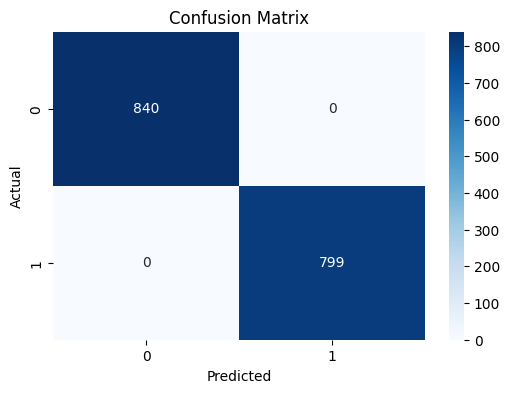

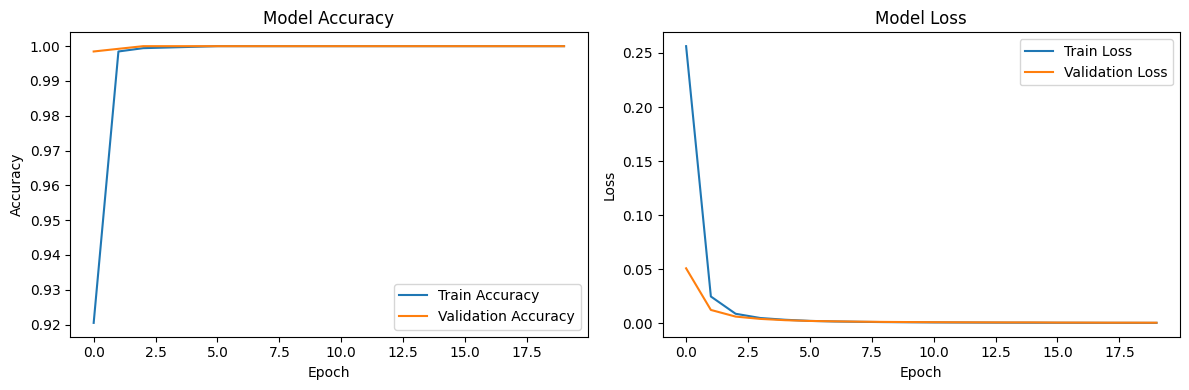

In [ ]:
# Load and preprocess data for classes C and E
classes_c = ['C']
classes_e = ['E']
X_c, y_c = prepare_data_for_classification(classes_c)
X_e, y_e = prepare_data_for_classification(classes_e)

# Merge and create new labels
X = np.concatenate([X_c, X_e])
y = np.concatenate([np.zeros(len(y_c)), np.ones(len(y_e))])  # 0 for C, 1 for E

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape data for CNN
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train and evaluate the CNN model
train_and_evaluate_cnn_model(X_train, y_train, X_test, y_test, filters=64, kernel_size=3, pool_size=2, batch_size=32, epochs=20)
